### Insurance premium prediction project  

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt 
import seaborn as sns 
print("libraries imported")

libraries imported


In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
# finding duplicates record 
print("Duplicate records : ",df.duplicated().sum())

Duplicate records :  1


In [64]:
# checking missing value 
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [65]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [66]:
df.columns  = ['age', 'gender', 'bmi', 'child', 'smoker', 'region', 'charges']


In [67]:
df.head(2)

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [68]:
df['gender'].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

In [69]:
df['region'].value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [70]:
df['charges'].min()

1121.8739

In [71]:
df['charges'].max()

63770.42801

In [72]:
df['charges'].mean()


13270.422265141257

In [73]:
female = df[df['gender'] == 'female']
male = df[df['gender'] == 'male']


In [74]:
print("Female charges : ",female['charges'].mean())
print("Male charges : ",male['charges'].mean())

Female charges :  12569.578843835347
Male charges :  13956.751177721893


In [75]:
female['smoker'].value_counts()

smoker
no     547
yes    115
Name: count, dtype: int64

In [76]:
male['smoker'].value_counts()


smoker
no     517
yes    159
Name: count, dtype: int64

In [77]:
print("Total Girls : ", female.shape[0]) 
print("Total Boys : ", male.shape[0] )
     

Total Girls :  662
Total Boys :  676


In [78]:
average_charges = female['charges'].mean()
df2 = female[female['charges'] <= average_charges]
df2.head()

,age,gender,bmi,child,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
13,56,female,39.82,0,no,southeast,11090.7178
16,52,female,30.78,1,no,northeast,10797.3362


In [79]:
print("Total Girls : ", df2.shape[0]) 

Total Girls :  441


In [80]:
df2['smoker'].value_counts()

smoker
no    441
Name: count, dtype: int64

In [81]:
average_charges = male['charges'].mean()
df3 = male[male['charges'] <= average_charges]
df3.head()

,age,gender,bmi,child,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
8,37,male,29.83,2,no,northeast,6406.4107
10,25,male,26.22,0,no,northeast,2721.3208


In [82]:
print("Total Mail : ", df3.shape[0]) 


Total Mail :  466


In [83]:
df3['smoker'].value_counts()


smoker
no     464
yes      2
Name: count, dtype: int64

### Male condidate region charges 

In [84]:
male_region = male.groupby('region')

In [85]:
male_region[['charges']].min()

,charges
region,
northeast,1694.7964
northwest,1621.3402
southeast,1121.8739
southwest,1241.5650


In [86]:
male_region[['charges']].max()


,charges
region,
northeast,48549.17835
northwest,60021.39897
southeast,62592.87309
southwest,52590.82939


In [87]:
male_region[['charges']].mean()


,charges
region,
northeast,13854.005374
northwest,12354.119575
southeast,15879.617173
southwest,13412.883576


In [88]:
male_region['charges'].agg(min_charges="min",max_charges='max',mean_charges='mean')

,min_charges,max_charges,mean_charges
region,,,
northeast,1694.7964,48549.17835,13854.005374
northwest,1621.3402,60021.39897,12354.119575
southeast,1121.8739,62592.87309,15879.617173
southwest,1241.5650,52590.82939,13412.883576


## Female condidate region chargs min , max , mean 

In [89]:
female_region = female.groupby('region')
female_group_analysis = female_region['charges'].agg(min_charges="min",max_charges='max',mean_charges='mean')
female_group_analysis

,min_charges,max_charges,mean_charges
region,,,
northeast,2196.47320,58571.07448,12953.203151
northwest,2117.33885,55135.40209,12479.870397
southeast,1607.51010,63770.42801,13499.669243
southwest,1727.78500,48824.45000,11274.411264


In [90]:
female_regions = list(female_group_analysis['mean_charges'].index)
female_regions

['northeast', 'northwest', 'southeast', 'southwest']

In [91]:
average_charges = list(female_group_analysis['mean_charges'].values)
average_charges

[12953.203151298138,
 12479.870396585366,
 13499.669242914284,
 11274.411263641974]

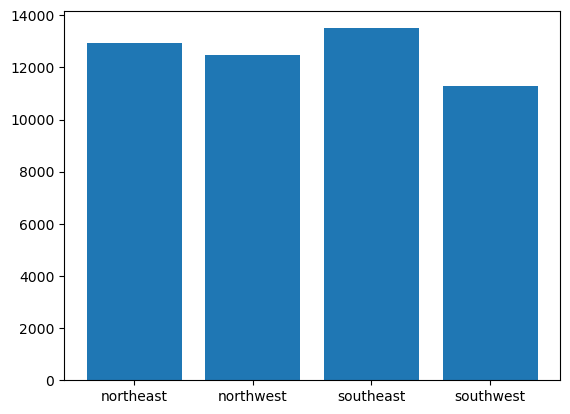

In [92]:
plt.bar(female_regions,average_charges)
plt.show()

In [93]:
#### assignment 
# feature engineering  
# < 18.5   ==> underweight 
# 18.5 to 24.9  ==> HealthyWeight 
# 25.0 to 29.9  ==> overweight
# 30 > "obese"

## underweight , HealthyWeight , overweight

# health_category 

In [94]:
df

,age,gender,bmi,child,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [95]:
ls = list(df['bmi'])
label = []
for w in ls:
    if w<18.5:
        label.append('Underweight')
    elif w >18.5 and w<24.9:
        label.append('HealthyWeight')
    elif w>25.0 and w <29.9:
        label.append('Overweight')
    else:
        label.append('obese')

In [96]:
df['health_category']=label

In [97]:
df.head()

,age,gender,bmi,child,smoker,region,charges,health_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,HealthyWeight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [98]:
# gender ==> onehot encode 

gender_dict = {'female':0,'male':1}
smoker_dict = {'yes':1,'no':0}

df['gender'] = df['gender'].map(gender_dict)
df['smoker'] = df['smoker'].map(smoker_dict)

In [99]:
df.health_category

0          Overweight
1               obese
2               obese
3       HealthyWeight
4          Overweight
            ...      
1333            obese
1334            obese
1335            obese
1336       Overweight
1337       Overweight
Name: health_category, Length: 1338, dtype: object

In [100]:
df.health_category.value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

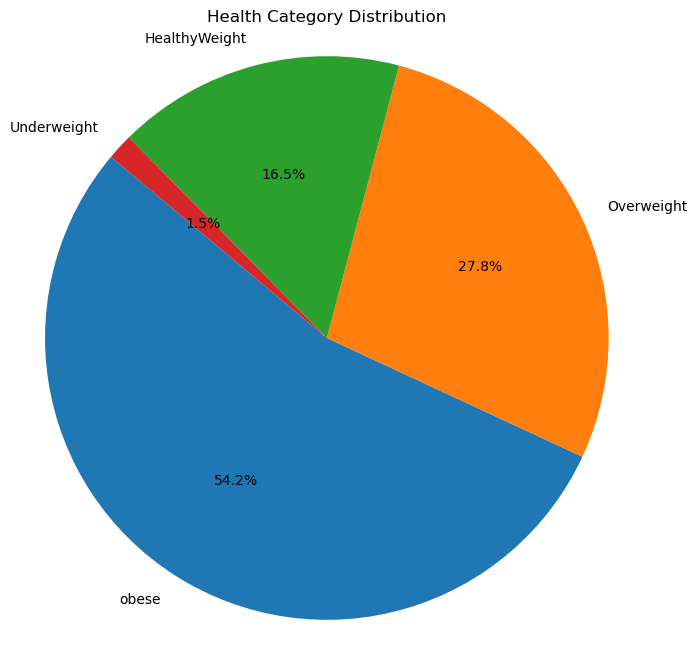

In [101]:
value_counts = df['health_category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Health Category Distribution')
plt.axis('equal')
plt.show()

In [102]:
df.health_category.value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [103]:
df['health_category'].value_counts()

health_category
obese            725
Overweight       372
HealthyWeight    221
Underweight       20
Name: count, dtype: int64

In [104]:
health_category_dict = {'Underweight':1,'HealthyWeight':2,'Overweight':3,'obese':4}
df['health_category'] = df['health_category'].map(health_category_dict)

In [105]:
df.head()

,age,gender,bmi,child,smoker,region,charges,health_category
0,19,0,27.900,0,1,southwest,16884.92400,3
1,18,1,33.770,1,0,southeast,1725.55230,4
2,28,1,33.000,3,0,southeast,4449.46200,4
3,33,1,22.705,0,0,northwest,21984.47061,2
4,32,1,28.880,0,0,northwest,3866.85520,3


In [106]:
# region

final_data=pd.get_dummies(df).astype(int)
final_data.head()

,age,gender,bmi,child,smoker,charges,health_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,3,0,0,0,1
1,18,1,33,1,0,1725,4,0,0,1,0
2,28,1,33,3,0,4449,4,0,0,1,0
3,33,1,22,0,0,21984,2,0,1,0,0
4,32,1,28,0,0,3866,3,0,1,0,0


In [107]:
### x and y split
x=final_data.drop('charges',axis='columns')
y=final_data[['charges']]

In [108]:
### training and testing split test_size=0.2

from sklearn.model_selection import train_test_split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [110]:
## Model Training 
# Regression
## 1 linear regression
## 2 decision tree
## Random Forest

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

In [111]:
## object creation 

lnr = LinearRegression()
dtr = DecisionTreeRegressor()
rdmfr = RandomForestRegressor()

## i am going with default parameters

In [112]:
## model train
lnr.fit(x_train,y_train)
dtr.fit(x_train,y_train)
rdmfr.fit(x_train,y_train)
print('you have trained your all algorithms')

c:\Users\saini\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


you have trained your all algorithms


In [113]:
## module training

print("Training score by linear : ",lnr.score(x_train,y_train)*100 )
print("Training score by DecisionTree : ",dtr.score(x_train,y_train)*100)
print("Training score by RandomForest : ",rdmfr.score(x_train,y_train)*100) 

print() 

print("Testing score by linear : ",lnr.score(x_test,y_test)*100 )
print("Testing score by DecisionTree : ",dtr.score(x_test,y_test)*100)
print("Testing score by RandomForest : ",rdmfr.score(x_test,y_test)*100)

Training score by linear :  75.80212443581472
Training score by DecisionTree :  99.81551230639477
Training score by RandomForest :  97.58420883531748

Testing score by linear :  73.20173251463888
Testing score by DecisionTree :  73.60437852856154
Testing score by RandomForest :  83.23629650359875


In [114]:
## prediction

prediction_linear = lnr.predict(x_test)
prediction_Decision = dtr.predict(x_test)
prediction_randonforest = rdmfr.predict(x_test)

In [115]:
x_test

,age,gender,bmi,child,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest
354,18,0,38,0,0,4,0,0,1,0
139,22,0,36,0,0,4,0,0,0,1
755,31,1,27,2,0,3,1,0,0,0
629,44,0,38,0,1,4,0,1,0,0
688,47,0,24,1,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
310,50,1,26,0,0,3,0,0,0,1
272,41,1,37,2,0,4,0,1,0,0
1292,21,1,23,0,0,2,0,0,1,0
303,28,0,33,2,0,4,0,0,1,0


In [116]:
comparison_df = pd.concat([x_test,y_test],axis=1)
comparison_df

,age,gender,bmi,child,smoker,health_category,region_northeast,region_northwest,region_southeast,region_southwest,charges
354,18,0,38,0,0,4,0,0,1,0,14133
139,22,0,36,0,0,4,0,0,0,1,2166
755,31,1,27,2,0,3,1,0,0,0,5031
629,44,0,38,0,1,4,0,1,0,0,42983
688,47,0,24,1,0,2,0,0,0,1,26236
...,...,...,...,...,...,...,...,...,...,...,...
310,50,1,26,0,0,3,0,0,0,1,8444
272,41,1,37,2,0,4,0,1,0,0,7265
1292,21,1,23,0,0,2,0,0,1,0,1515
303,28,0,33,2,0,4,0,0,1,0,4349


In [117]:
import joblib,os

In [118]:
### saving the models

os.makedirs('models',exist_ok=True)
joblib.dump(lnr,'./models/linear_model.lb')
joblib.dump(dtr,'./models/decision_tree.lb')
joblib.dump(rdmfr,'./models/randomforest.lb')

['./models/randomforest.lb']

<h1>Thank you🤗<h1>